## Neste exemplo vamos verificar o uso do nosso dataset "cb_br_2022.csv" para verificarmos o 'custo benefício', ou, talvez, o motivo que levou determinado veículo ao topo das vendas.
### Vamos usar dados reais dos seis automóveis "populares" mais vendidos no Brasil em 2022, sendo estes os carros de entrada em suas variações e seus preços médios. Vamos analisar a capacidade dos motores, como consumo, torque e potência. É um exemplo simples, apenas para entender a PCA, suas aplicações, resultados e a necessidade de se aplicar ou não.

In [106]:
# Importando nossas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [107]:
# Importando nosso dataset
df = pd.read_csv('cb_br_2022.csv')
display(df)

,modelo,motor,km/litro_gas_cid,km/litro_gas_est,km/litro_alc_cid,km/litro_alc_est,peso/kg,torque_gas,torque_alc,cavalos_gas,cavalos_alc,valor
0,Strada CS,1.4,10.8,12.3,7.4,8.5,1.151,13.7,14.2,85,88,93.890
1,Gol msi,1.0,13.3,14.4,9.1,10.1,1.001,9.7,10.4,75,84,63.738
2,Onix hb,1.0,13.9,16.7,9.9,11.7,1.037,9.6,10.6,78,82,63.430
3,Ka hb,1.0,13.4,15.5,9.2,10.7,1.037,10.2,10.7,80,85,49.890
4,Hb20,1.0,12.8,14.6,9.1,10.1,1.091,9.4,10.2,75,80,63.690
5,Kwid,1.0,14.9,15.6,10.3,10.6,0.779,9.4,9.8,66,70,42.690


In [108]:
# Apesar deste exemplo ser pequeno, sempre precisamos fazer o trivial e verificarmos os se dados estão corretos.
# Precisamos verificar se os dados estão com seu "tipos (Dtype) corretos", se não há "nulos (Null)", entre outros.
df.info() # Verificando as informções 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   modelo            6 non-null      object 
 1   motor             6 non-null      float64
 2   km/litro_gas_cid  6 non-null      float64
 3   km/litro_gas_est  6 non-null      float64
 4   km/litro_alc_cid  6 non-null      float64
 5   km/litro_alc_est  6 non-null      float64
 6   peso/kg           6 non-null      float64
 7   torque_gas        6 non-null      float64
 8   torque_alc        6 non-null      float64
 9   cavalos_gas       6 non-null      int64  
 10  cavalos_alc       6 non-null      int64  
 11  valor             6 non-null      float64
dtypes: float64(9), int64(2), object(1)
memory usage: 704.0+ bytes


In [109]:
df.describe() # Para termos um panorama de como os dados se coomportam. É possível verificar a média(mean)
# o desvio padrão(std), os quartis(25%, 50%, 75%), entre outras.

,motor,km/litro_gas_cid,km/litro_gas_est,km/litro_alc_cid,km/litro_alc_est,peso/kg,torque_gas,torque_alc,cavalos_gas,cavalos_alc,valor
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.066667,13.183333,14.850000,9.166667,10.283333,1.016000,10.333333,10.983333,76.500000,81.500000,62.888000
std,0.163299,1.367358,1.494992,0.995322,1.051507,0.127378,1.675311,1.608001,6.348228,6.252999,17.548166
min,1.000000,10.800000,12.300000,7.400000,8.500000,0.779000,9.400000,9.800000,66.000000,70.000000,42.690000
25%,1.000000,12.925000,14.450000,9.100000,10.100000,1.010000,9.450000,10.250000,75.000000,80.500000,53.275000
50%,1.000000,13.350000,15.050000,9.150000,10.350000,1.037000,9.650000,10.500000,76.500000,83.000000,63.560000
75%,1.000000,13.775000,15.575000,9.725000,10.675000,1.077500,10.075000,10.675000,79.500000,84.750000,63.726000
max,1.400000,14.900000,16.700000,10.300000,11.700000,1.151000,13.700000,14.200000,85.000000,88.000000,93.890000


In [110]:
df.corr() # A correlação nos traz dados interessantes, por exemplo, linearidade entre "valor x km/litro_"

,motor,km/litro_gas_cid,km/litro_gas_est,km/litro_alc_cid,km/litro_alc_est,peso/kg,torque_gas,torque_alc,cavalos_gas,cavalos_alc,valor
motor,1.000000,-0.853903,-0.835617,-0.869554,-0.830857,0.519212,0.984488,0.979999,0.655952,0.509249,0.865493
km/litro_gas_cid,-0.853903,1.000000,0.868315,0.985578,0.827430,-0.849163,-0.864055,-0.891583,-0.830617,-0.777770,-0.926853
km/litro_gas_est,-0.835617,0.868315,1.000000,0.911291,0.993006,-0.505699,-0.815308,-0.792446,-0.494176,-0.486726,-0.779379
km/litro_alc_cid,-0.869554,0.985578,0.911291,1.000000,0.876499,-0.780866,-0.892767,-0.902646,-0.807149,-0.774453,-0.890952
km/litro_alc_est,-0.830857,0.827430,0.993006,0.876499,1.000000,-0.430494,-0.806842,-0.771419,-0.429949,-0.403037,-0.722239
peso/kg,0.519212,-0.849163,-0.505699,-0.780866,-0.430494,1.000000,0.559518,0.635374,0.903014,0.888140,0.783627
torque_gas,0.984488,-0.864055,-0.815308,-0.892767,-0.806842,0.559518,1.000000,0.991375,0.737171,0.603300,0.838635
torque_alc,0.979999,-0.891583,-0.792446,-0.902646,-0.771419,0.635374,0.991375,1.000000,0.788601,0.657396,0.892887
cavalos_gas,0.655952,-0.830617,-0.494176,-0.807149,-0.429949,0.903014,0.737171,0.788601,1.000000,0.944692,0.769190
cavalos_alc,0.509249,-0.777770,-0.486726,-0.774453,-0.403037,0.888140,0.603300,0.657396,0.944692,1.000000,0.709915


<Figure size 1080x504 with 0 Axes>

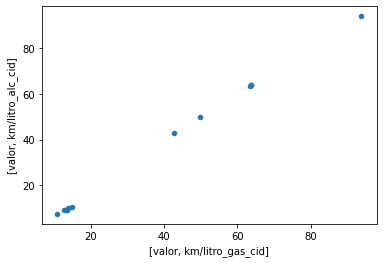

In [111]:
plt.figure(1, figsize = (15, 7));
df.plot.scatter((['valor','km/litro_gas_cid']),(['valor','km/litro_alc_cid']));
# A função scatter() nos traz um gráfico que corrobora com a linearidade que vimos.

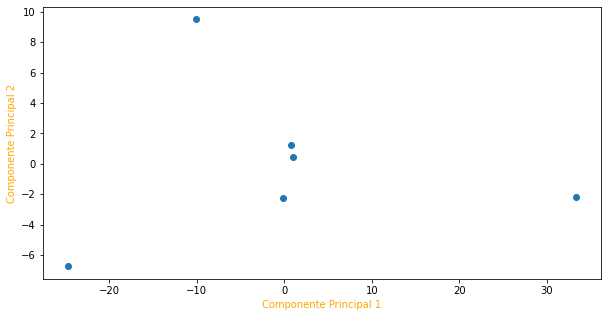

In [112]:
# Começando nossa PCA
# Selecionamos nossas colunas numéricas
col_num = ['motor', 'km/litro_gas_cid', 'km/litro_gas_est', 'km/litro_alc_cid','km/litro_alc_est',
           'peso/kg', 'torque_gas', 'torque_alc', 'cavalos_gas', 'cavalos_alc', 'valor']
df_pca = df[col_num]
# Instanciando o objeto PCA
pca = PCA(n_components=2)
# Ajustando o modelo PCA aos dados
pca.fit(df_pca)
# Tranformando os dados para novas dimensões
df_pca_transformado = pca.transform(df_pca)
# Plotando em um gráfico de dispersão com os dados transformados
plt.figure(1, figsize=(10, 5))
plt.scatter(df_pca_transformado[:, 0], df_pca_transformado[:, 1]) 
plt.xlabel('Componente Principal 1', color = "orange") 
plt.ylabel('Componente Principal 2', color = "orange") 
plt.show()


In [113]:
X = df[['motor', 'km/litro_gas_cid', 'km/litro_gas_est', 'km/litro_alc_cid','km/litro_alc_est','peso/kg', 'torque_gas', 'torque_alc', 'cavalos_gas', 'cavalos_alc']]
Y = df['valor']

In [114]:
# Verificando nossa matriz
print(pca.components_)

[[ 0.00730917 -0.06764998 -0.05985596 -0.04757287 -0.03871679  0.00555726
   0.07437366  0.07600178  0.27818508  0.25686471  0.9128637 ]
 [-0.00591433 -0.0171997   0.06312993 -0.01668843  0.0527985   0.0091925
  -0.009444   -0.00464452  0.6115249   0.69102911 -0.37541767]]


In [115]:
# Verificando os autovalores e os autovetores e a redução dos componentes
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[364.4715113   29.50358537]
[0.91352114 0.07394857]


In [116]:
# Verificando o coeficiente de correlação
df_pca_transformado_df = pd.DataFrame(df_pca_transformado, columns=["PC1", "PC2"])
df_pca_transformado_df.corr()

,PC1,PC2
PC1,1.000000e+00,1.644494e-16
PC2,1.644494e-16,1.000000e+00


In [117]:
# Transformando os valores de "X"
X_pca = pca.fit_transform(X)
X_pca

array([[-11.91822714,   3.55702457],
       [ -0.52442372,  -1.35284095],
       [ -0.8162508 ,  -2.31832437],
       [ -4.59726612,  -1.90941619],
       [  2.18652962,   0.05153624],
       [ 15.66963816,   1.9720207 ]])

In [118]:
# Extraindo custo benefício
# IMPORTANTE: Foi preciso incluir o parâmetro '-Y.mean()', para apontarmos qual automóvel está abaixo da
# média do "valor"
melhor_custo_beneficio = Y / (X_pca[:, 0] + X_pca[:, 1] - Y.mean())
# encontrar o índice da amostra com o maior benefício
melhor_custo = melhor_custo_beneficio.argmax()
# imprimir a marca correspondente
print('O melhor custo benefício é do ', df.iloc[melhor_custo]['modelo'])
# Veja que é muito simples entender nosso objetivo, bastar olhar o dataset(pequeno) que fica fácil de perceber
# que o 'Ka hb' tem o custo-benefício melhor.

O melhor custo benefício é do  Ka hb


## O 'Ka hb' tem o melhor custo benefício, então porque não vende mais que o 'Gol' e o 'Onix'?
### Apesar da média de preço do 'Ka' ser mais atraente que os concorrentes e alguns quesitos serem melhores, ainda assim existem outros fatores que influenciam nas venda do produto, o 'design' e a 'marca' poderiam ser alguns deles. seria necessário uma análise mais direcionada para identificarmos esses elementos.

In [149]:
# Extraindo custo benefício
# Mudando o parâmetro 'Y' para '+'(acima da média)
pior_custo_beneficio = Y / (X_pca[:, 0] + X_pca[:, 1] + Y.mean())
# encontrar o índice da amostra com o maior benefício
pior_custo = pior_custo_beneficio.argmax()
# imprimir a marca correspondente
print('O pior custo benefício é do ', df.iloc[pior_custo]['modelo'])
# Veja que é muito simples entender nosso objetivo, bastar olhar o dataset(pequeno) e fica fácil de perceber
# que a 'Strada CS' tem o custo-benefício inferior aos demais.

O pior custo benefício é do  Strada CS


## Então porque a 'Strada CS' vende mais? 
### A Strada perde na comparação de todos os quesitos, mas, é o único utilitário com carroceria aberta do grupo e também um motor 1.4, logo, esses poderiam vir a ser os diferenciais. Talvez fosse interessante descosidera-la da amostra e incluí-la em um grupo específico. Talvez a necessidade por este tipo de veículo pelas empresas possa explicar, mas, essa é outra análise.

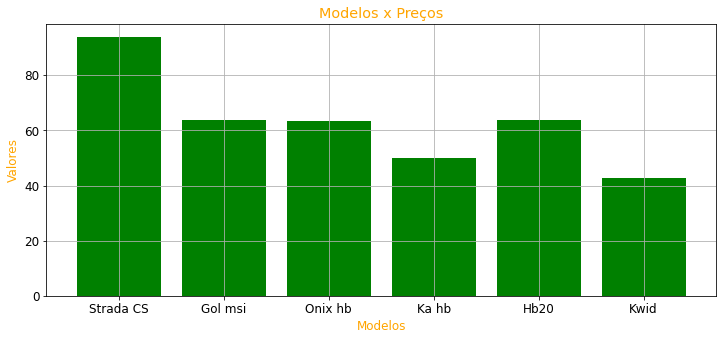

In [180]:
# No fim, pela simples análise do gráfico, claramente por conta do fator "preço", fica fácil de entender
# o melhor custo benefício, mesmo que o "Kwid" seja mais barato, ele não tem algumas características,
# como robustez, etc...talvez a marca influencie neste resultado.
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})
plt.figure(1, figsize=(12, 5))
plt.bar(df['modelo'], df['valor'], color = 'green')
plt.xlabel ('Modelos', color = 'orange')
plt.ylabel ('Valores', color = 'orange')
plt.grid(True)
plt.title("Modelos x Preços", color = 'orange')
plt.show()

## Lembrando que este trabalho é apenas um fragmento simples e diminuto do que poderia ser a PCA. Comprender o que são "pca.explained_variance" e "pca.explained_variance_ratio" no contexto das amostras é fundamental para sua aplicação correta.
### Portanto, entender o objetivo e a necessidade da análise é fundamental para a correta aplicação das diversas ferramentas que temos disponíveis, não só em Python, mas, em outras plataformas e linguagens.